# 11.1 핵심 개념
- 스태킹 : 데이터셋이 아니라, 여러 학습기에서 예측한 예측값으로 다시 학습 데이터를 만들어 일반화된 최종 모델을 구성하는 방법
- 데이터셋이 아닌 예측값들로 예측
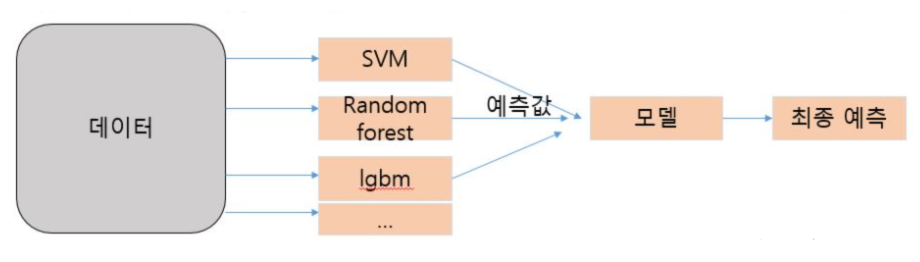

# 11.3 분석 코드

## Part1. 분류

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
data=pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')

X=data[data.columns[1:-1]]
y=data[['Class']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [8]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

model=StackingClassifier(estimators=[('rf',RandomForestClassifier(n_estimators=10, random_state=42)),
                                     ('svr', SVC(random_state=42))],
                        final_estimator=LogisticRegression())
model.fit(X_scaled_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression())

In [9]:
pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)

print(f"TrainSet Score : {model.score(X_scaled_train, y_train)}\nTestSet Score: {model.score(X_scaled_test, y_test)}")

TrainSet Score : 0.986328125
TestSet Score: 0.9649122807017544


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_train=confusion_matrix(y_train, pred_train)
cfreport_train=classification_report(y_train, pred_train)
print(f"TrainSet 오차행렬 : \n{confusion_train}\n분류예측 레포트 : \n{cfreport_train}")

TrainSet 오차행렬 : 
[[330   3]
 [  4 175]]
분류예측 레포트 : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       333
           1       0.98      0.98      0.98       179

    accuracy                           0.99       512
   macro avg       0.99      0.98      0.98       512
weighted avg       0.99      0.99      0.99       512



In [11]:
confusion_test=confusion_matrix(y_test, pred_test)
cfreport_test=classification_report(y_test, pred_test)
print(f"TestSet 오차행렬 : \n{confusion_test}\n분류예측 레포트 : \n{cfreport_test}")

TestSet 오차행렬 : 
[[106   5]
 [  1  59]]
분류예측 레포트 : 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       111
           1       0.92      0.98      0.95        60

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## Part2. 회귀

In [15]:
data2=pd.read_csv('../data/house_price.csv', encoding='utf-8')
X=data2[data2.columns[:-1]]
y=data2[['house_value']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
model=StackingRegressor(estimators=[('lr',LinearRegression()),
                                    ('knn',KNeighborsRegressor())],
                       final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))
model.fit(X_scaled_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [16]:
pred_train=model.predict(X_scaled_train)
pred_test=model.predict(X_scaled_test)
print("TrainSet Score : ", model.score(X_scaled_train, y_train))
print("testSet Score : ", model.score(X_scaled_test, y_test))

TrainSet Score :  0.6024482972648368
testSet Score :  0.5311259081832682


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error
RMSE_train=np.sqrt(mean_squared_error(y_train, pred_train))
RMSE_test=np.sqrt(mean_squared_error(y_test, pred_test))
print(f"TrainSet RMSE : {RMSE_train}\nTestSet RMSE : {RMSE_test}")

TrainSet RMSE : 60179.399925472404
TestSet RMSE : 65462.1992837271
